TODO:

- Makegrid
- Original settings of paper

## Setup
<a id="setup"></a>

In [1]:
%load_ext autoreload
%autoreload 2

### Config
<a id="setup_config"></a>

In [2]:
import assignment.config as config

config.list_available()

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/config.yaml


['celeba_dcgan', 'celeba_unnormalized', 'svhn_cdcgan', 'svhn_unnormalized']

### Modules
<a id="setup_modules"></a>

In [3]:
from pathlib import Path

import assignment.scripts.init_exp as init_exp
import assignment.scripts.compute_mean_and_std as compute_mean_and_std
from assignment.evaluation.evaluator_gan import Evaluator
from assignment.training.trainer_gan import Trainer
import assignment.libs.factory as factory
import assignment.libs.utils_checkpoints as utils_checkpoints
import assignment.libs.utils_data as utils_data
import assignment.libs.utils_model as utils_model
import assignment.visualization.plot as plot
import assignment.visualization.visualize as visualize

### Paths and names
<a id="setup_paths_and_names"></a>

In [4]:
name_exp_svhn_unnormalized = "svhn_unnormalized"
name_exp_celeba_unnormalized = "celeba_unnormalized"
name_exp_svhn_cdcgan = "svhn_cdcgan"
name_exp_celeba_dcgan = "celeba_dcgan"

path_dir_exp_svhn_cdcgan = Path(config._PATH_DIR_EXPS) / name_exp_svhn_cdcgan
path_dir_exp_celeba_dcgan = Path(config._PATH_DIR_EXPS) / name_exp_celeba_dcgan

## Data

### SVHN

In [15]:
compute_mean_and_std.compute_mean_and_std(name_config=name_exp_svhn_unnormalized, split="training")

Computing mean and standard deviation ...
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/svhn_unnormalized.yaml
Using downloaded and verified file: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/svhn/train_32x32.mat
Dataset
Dataset SVHN
    Number of samples: 58605
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/svhn
    Split: training
    Transform of samples: Compose(
      PILToTensor()
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
)
    Transform of targets: None
Mean: tensor([0.4376, 0.4438, 0.4727])
Standard deviation: tensor([0.1981, 0.2010, 0.1970])
Computing mean and standard deviation finished


In [16]:
init_exp.init_exp(name_exp=name_exp_svhn_cdcgan, name_config=name_exp_svhn_cdcgan)

Initializing experiment svhn_cdcgan...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/tensorboard
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/svhn_cdcgan.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/config.yaml
Initializing experiment svhn_cdcgan fini

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/config.yaml


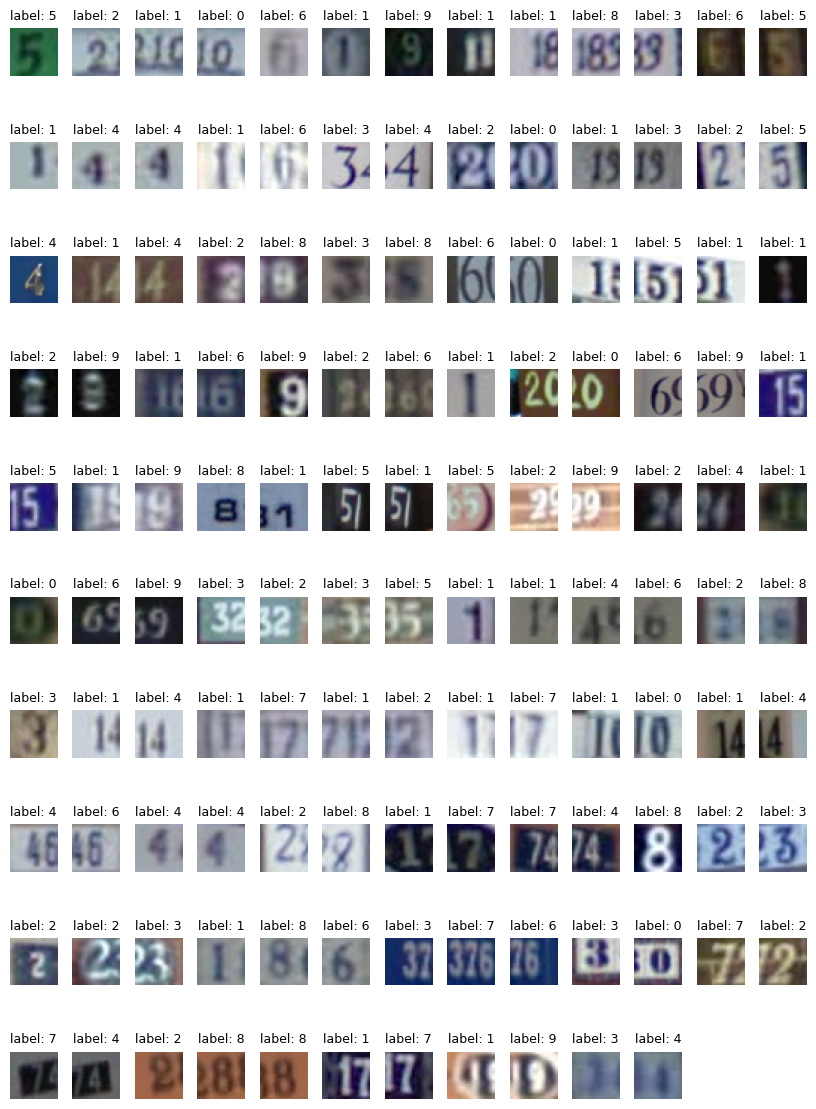

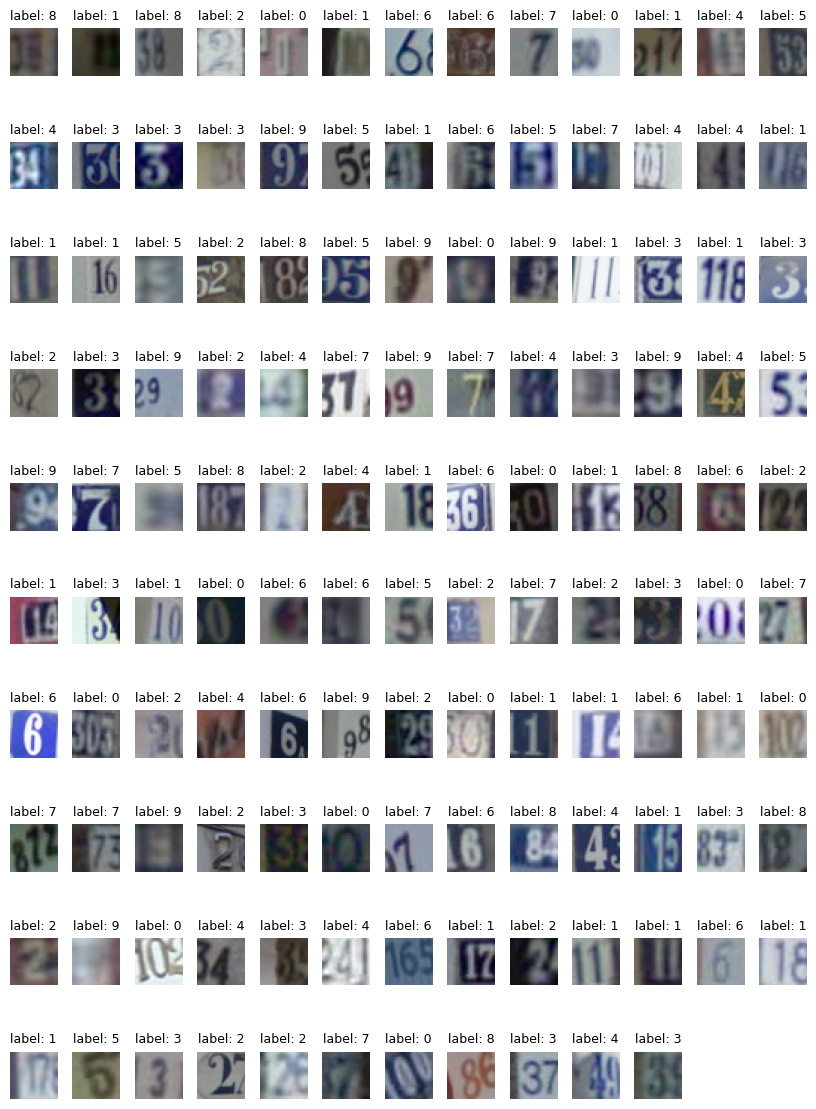

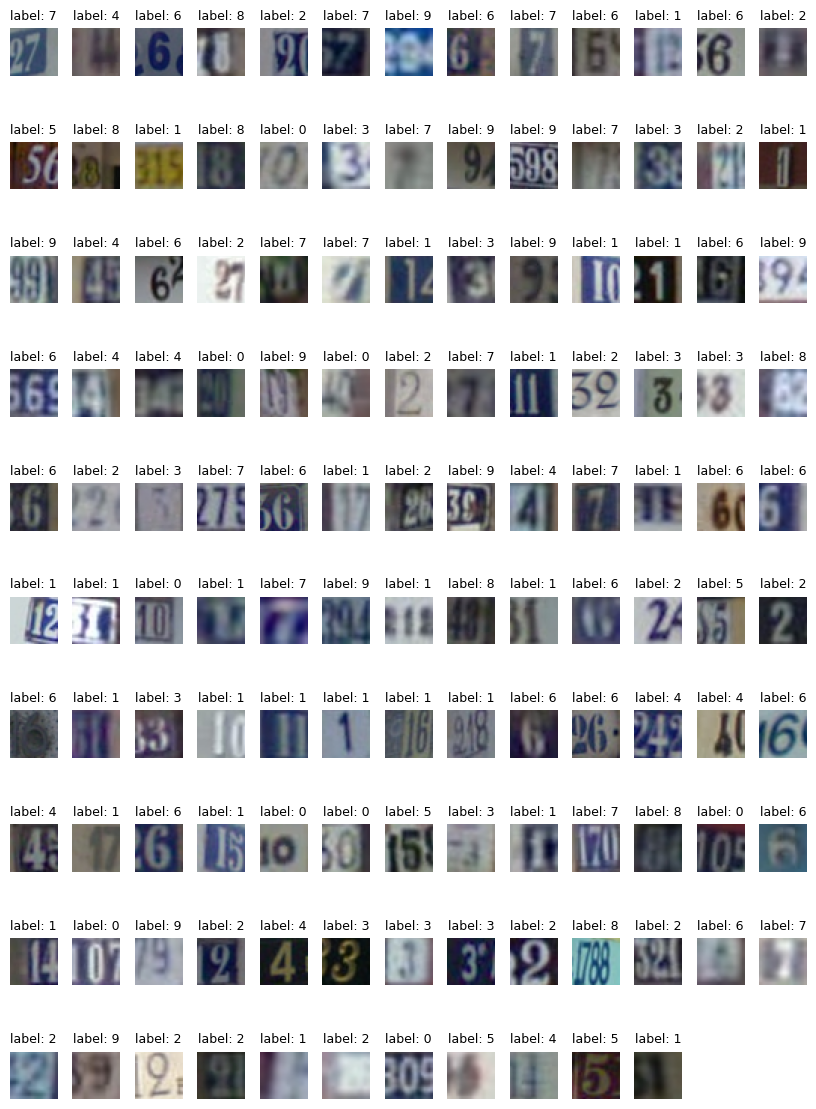

In [17]:
config.set_config_exp(path_dir_exp_svhn_cdcgan)

splits = ["test", "validation", "training", "training"]
uses_unnormalize = [True, True, True, False]

for split, use_unnormalize in zip(splits, uses_unnormalize):
    features, target = utils_data.sample(split=split, use_unnormalize=use_unnormalize)

    path_save = path_dir_exp_svhn_cdcgan / "visualizations" / f"Sample_{split}{"" if use_unnormalize else "_normalized"}.png"
    visualize.visualize_images(features, labels=target, path_save=path_save)

### CelebA

In [18]:
compute_mean_and_std.compute_mean_and_std(name_config=name_exp_celeba_unnormalized, split="training")

Computing mean and standard deviation ...
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/celeba_unnormalized.yaml
Files already downloaded and verified


Dataset
Dataset CelebA
    Number of samples: 162770
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/celeba
    Split: training
    Transform of samples: Compose(
      PILToTensor()
      CenterCrop(size=[178, 178])
      Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
)
    Transform of targets: None
Mean: tensor([0.5084, 0.4224, 0.3768])
Standard deviation: tensor([0.3048, 0.2824, 0.2808])
Computing mean and standard deviation finished


In [19]:
init_exp.init_exp(name_exp=name_exp_celeba_dcgan, name_config=name_exp_celeba_dcgan)

Initializing experiment celeba_dcgan...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/tensorboard
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/celeba_dcgan.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/config.yaml
Initializing experiment celeba_

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/config.yaml


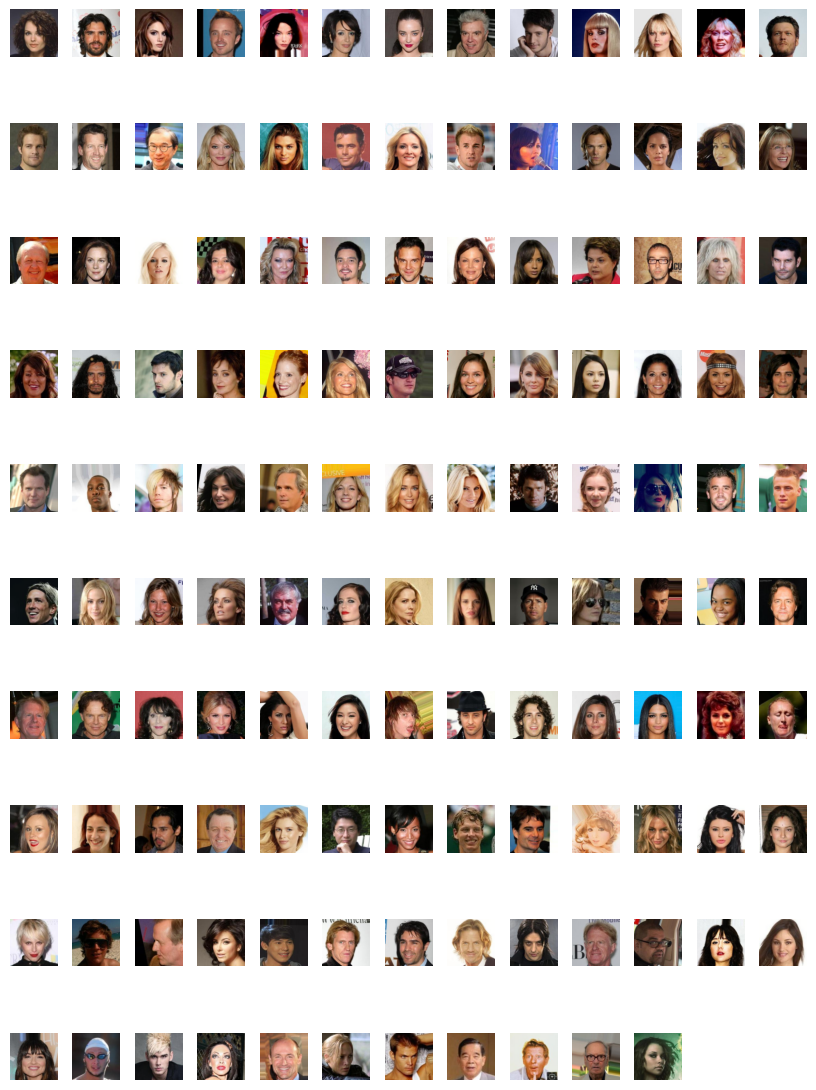

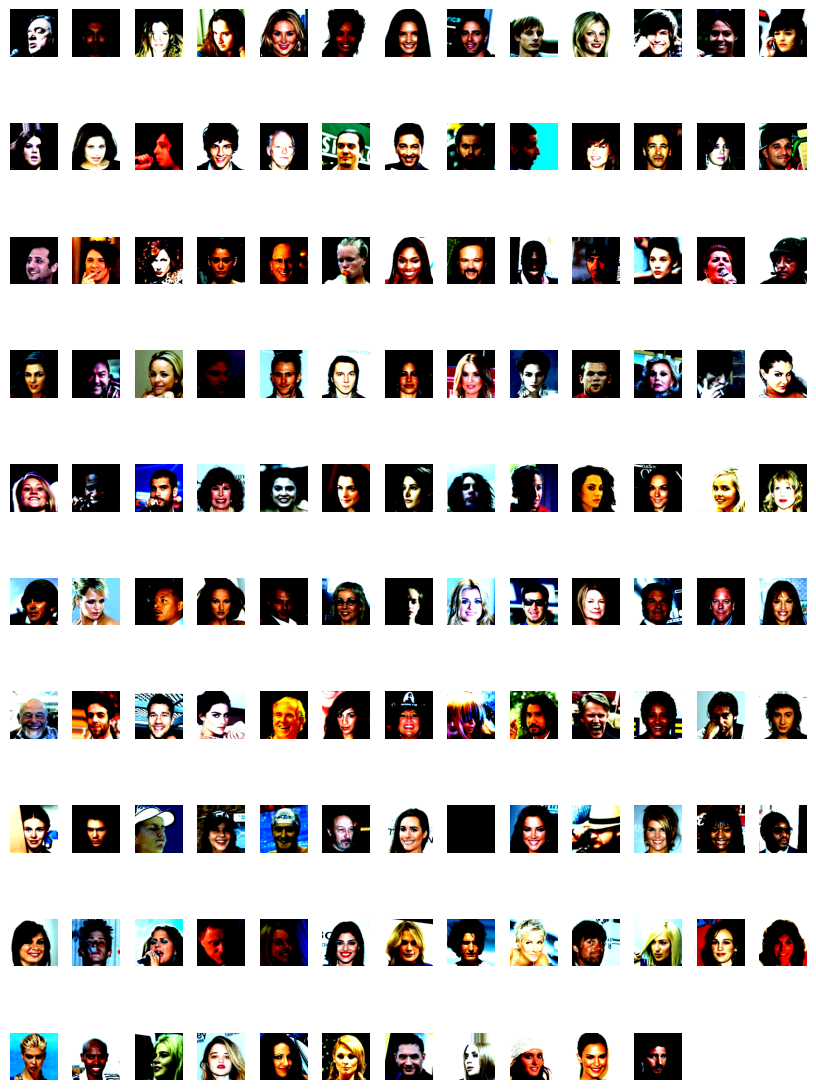

In [20]:
config.set_config_exp(path_dir_exp_celeba_dcgan)

splits = ["test", "validation", "training", "training"]
uses_unnormalize = [True, True, True, False]

for split, use_unnormalize in zip(splits, uses_unnormalize):
    features, target = utils_data.sample(split=split, use_unnormalize=use_unnormalize)

    path_save = path_dir_exp_celeba_dcgan / "visualizations" / f"Sample_{split}{"" if use_unnormalize else "_normalized"}.png"
    visualize.visualize_images(features, path_save=path_save)

## Experiments

### CDCGAN on SVHN

In [21]:
init_exp.init_exp(name_exp=name_exp_svhn_cdcgan, name_config=name_exp_svhn_cdcgan)

Initializing experiment svhn_cdcgan...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/tensorboard
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/assignment/configs/svhn_cdcgan.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/config.yaml
Initializing experiment svhn_cdcgan fini

In [28]:
config.set_config_exp(path_dir_exp_svhn_cdcgan)

trainer = Trainer(name_exp_svhn_cdcgan)
trainer.loop(config.TRAINING["num_epochs"])

log = trainer.log
path_plots = path_dir_exp_svhn_cdcgan / "plots"
plot.plot_loss(log, path_save=path_plots / "Loss.png")
plot.plot_metrics(log, path_plots=path_plots)
plot.plot_learning_rate(log, path_save=path_plots / "Learning_rate.png")

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan/config.yaml
Trainer for experiment svhn_cdcgan
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/svhn_cdcgan
    Dataset (training): Dataset SVHN
    Number of samples: 58605
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/svhn
    Split: training
    Transform of samples: Compose(
      PILToTensor()
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
      Normalize(mean=[0.4375, 0.4436, 0.4727], std=[0.1979, 0.2009, 0.1968], inplace=False)
)
    Transform of targets: None
    Dataset (validation): Dataset SVHN
    Number of samples: 14652
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/svhn
    Split: validation
    Transform of samples: Compose(
      PILToTensor()
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
      Normalize(mean=

  0%|          | 0/115 [00:00<?, ?it/s]


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 128 but got size 1 for tensor number 1 in the list.

In [ ]:
samples = trainer.model_generator.sample(num_samples=64)
samples = samples.cpu()
samples = utils_data.unnormalize(samples, split="test")

path_save = path_dir_exp_svhn_cdcgan / "visualizations" / "Samples_generated_unnormalized.png"
visualize.visualize_images(samples, path_save=path_save)

In [ ]:
path_save = path_dir_exp_svhn_cdcgan / "visualizations" / "Interpolation_grid.png"
visualize.visualize_interpolation_grid(trainer.model_generator, shape_image=(128, 128), num_channels_latent=64, path_save=path_save, use_unnormalize=True)

### DCGAN on CelebA

Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan/config.yaml
Trainer for experiment celeba_dcgan
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/experiments/celeba_dcgan
    Dataset (training): Dataset CelebA
    Number of samples: 162770
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/celeba
    Split: training
    Transform of samples: Compose(
      PILToTensor()
      CenterCrop(size=[178, 178])
      Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
      Normalize(mean=[0.5084, 0.4224, 0.3768], std=[0.3048, 0.2824, 0.2808], inplace=False)
)
    Transform of targets: None
    Dataset (validation): Dataset CelebA
    Number of samples: 19867
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_6/data/celeba
    Split: validation
    Transform of

Validation: Epoch 000 | Batch 150 | LR 0.000100 | Loss (descriminator) 1.38623 | Loss (generator) 0.69147: 100%|██████████| 156/156 [00:24<00:00,  6.48it/s]
Training: Epoch 001 | Batch 1270 | LR 0.000100 | Loss (descriminator) 0.65227 | Loss (generator) 4.24489: 100%|██████████| 1272/1272 [04:32<00:00,  4.66it/s]
Validation: Epoch 001 | Batch 150 | LR 0.000100 | Loss (descriminator) 1.00554 | Loss (generator) 1.52133: 100%|██████████| 156/156 [00:23<00:00,  6.67it/s]
Training: Epoch 002 | Batch 1270 | LR 0.000140 | Loss (descriminator) 0.62400 | Loss (generator) 4.09960: 100%|██████████| 1272/1272 [04:32<00:00,  4.67it/s]
Validation: Epoch 002 | Batch 150 | LR 0.000140 | Loss (descriminator) 0.59052 | Loss (generator) 1.40200: 100%|██████████| 156/156 [00:21<00:00,  7.33it/s]
Training: Epoch 003 | Batch 1270 | LR 0.000180 | Loss (descriminator) 0.95617 | Loss (generator) 3.57032: 100%|██████████| 1272/1272 [04:32<00:00,  4.67it/s]
Validation: Epoch 003 | Batch 150 | LR 0.000180 | Loss 

Looping finished


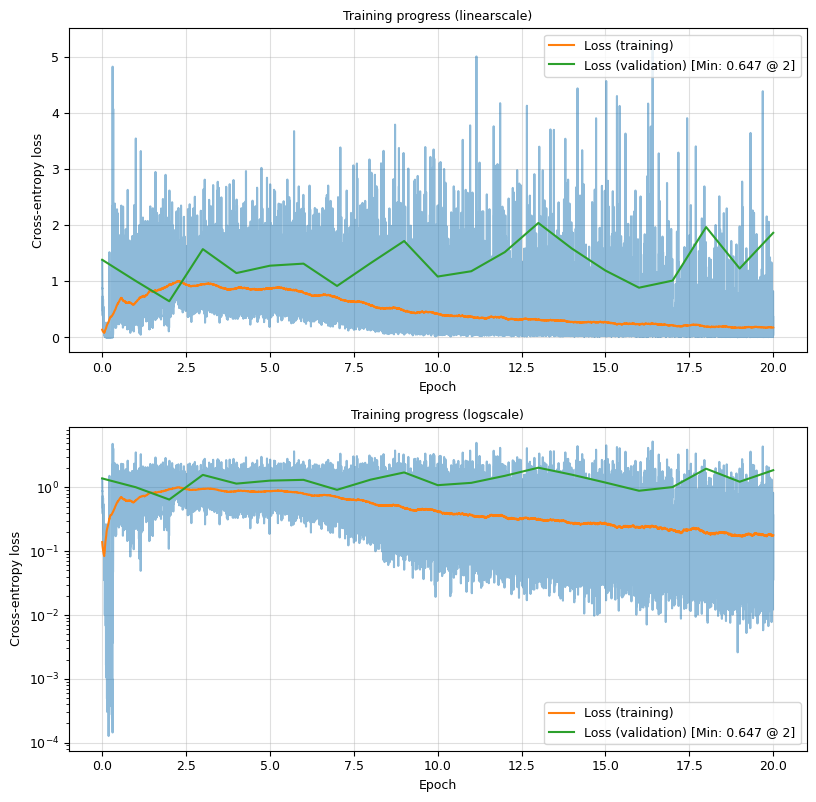

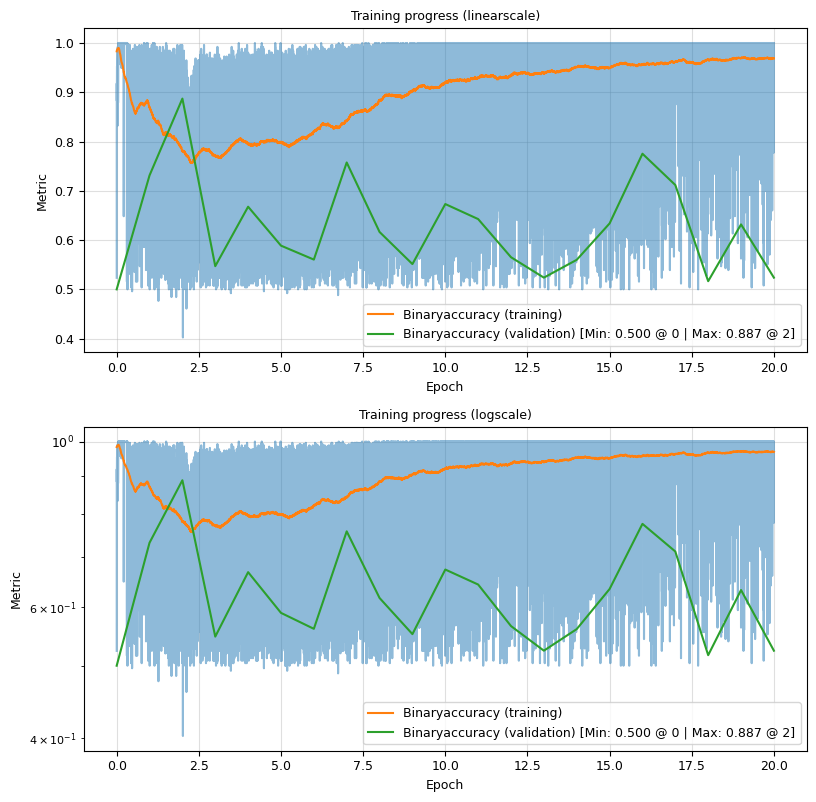

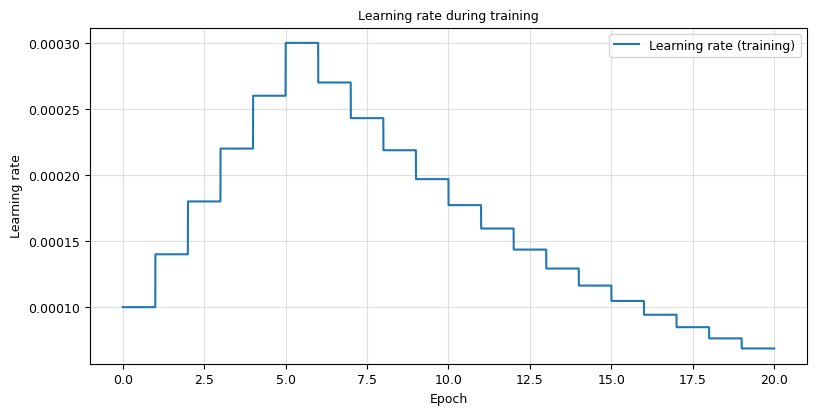

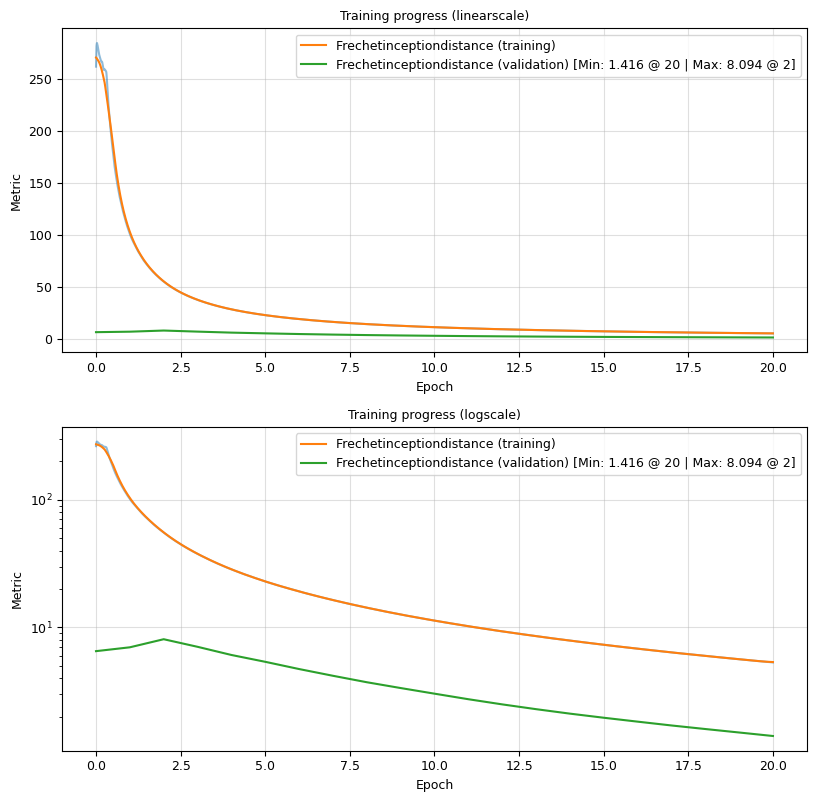

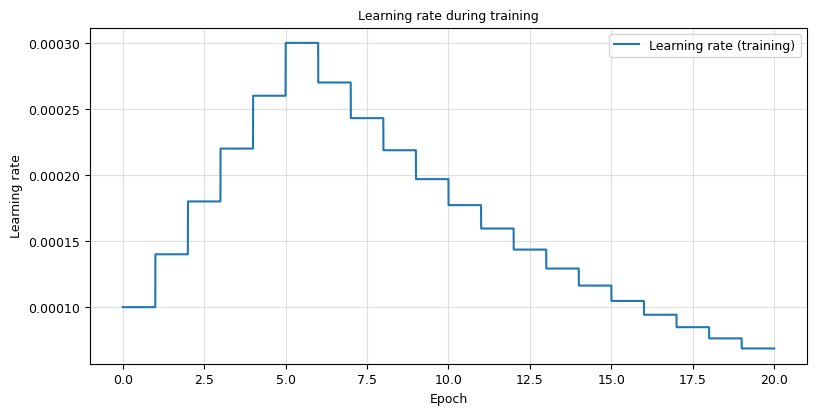

In [5]:
config.set_config_exp(path_dir_exp_celeba_dcgan)

trainer = Trainer(name_exp_celeba_dcgan)
trainer.loop(config.TRAINING["num_epochs"])

log_discriminator = trainer.log_discriminator
path_plots = path_dir_exp_celeba_dcgan / "plots"
plot.plot_loss(log_discriminator, path_save=path_plots / "Loss_discriminator.png")
plot.plot_metrics(log_discriminator, path_plots=path_plots, suffix="discriminator")
plot.plot_learning_rate(log_discriminator, path_save=path_plots / "Learning_rate_discriminator.png")

log_generator = trainer.log_generator
path_plots = path_dir_exp_celeba_dcgan / "plots"
plot.plot_loss(log_generator, path_save=path_plots / "Loss_generator.png")
plot.plot_metrics(log_generator, path_plots=path_plots, suffix="generator")
plot.plot_learning_rate(log_generator, path_save=path_plots / "Learning_rate_generator.png")

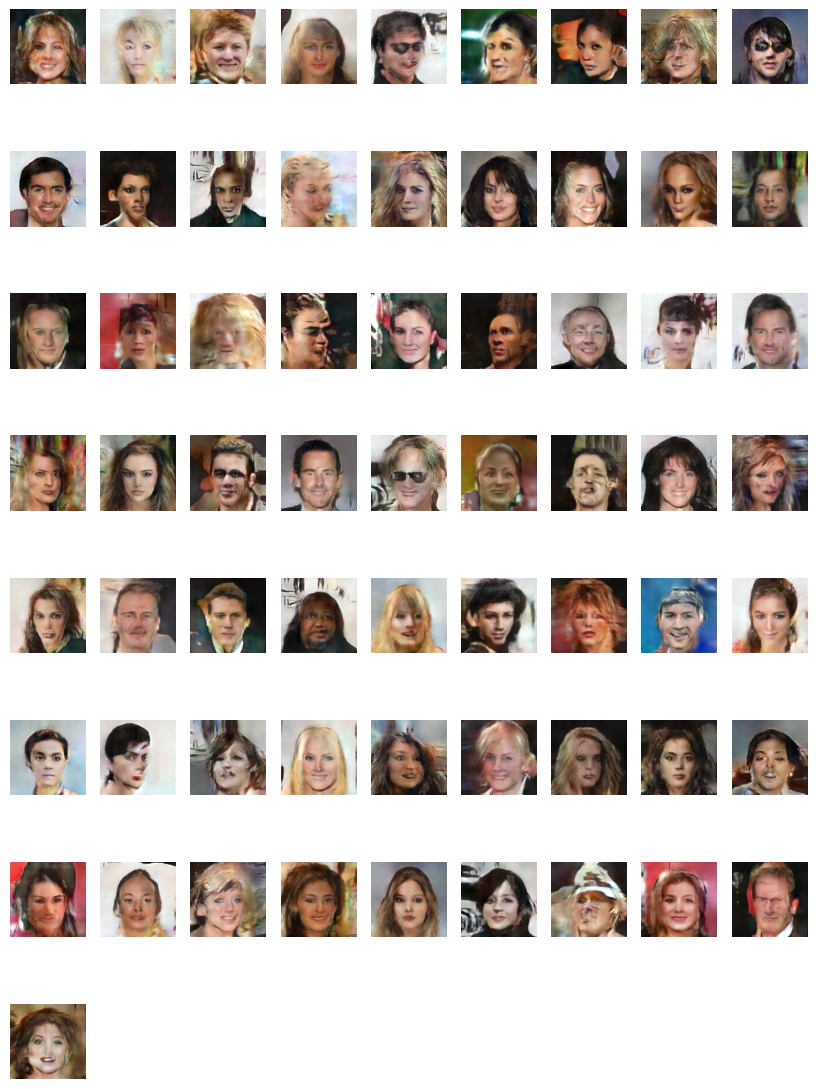

In [8]:
samples = trainer.model_generator.sample(num_samples=64)
samples = samples.cpu()
samples = utils_data.unnormalize(samples, split="test")

path_save = path_dir_exp_celeba_dcgan / "visualizations" / "Samples_generated_unnormalized.png"
visualize.visualize_images(samples, path_save=path_save)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


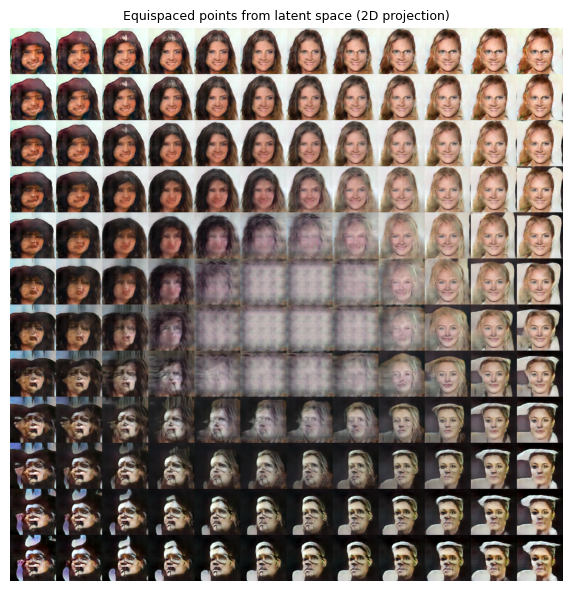

In [11]:
path_save = path_dir_exp_celeba_dcgan / "visualizations" / "Interpolation_grid.png"
visualize.visualize_interpolation_grid(trainer.model_generator, shape_image=(128, 128), label_input=None, num_channels_latent=128, path_save=path_save, use_unnormalize=True)